In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import wordcloud

nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIKITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NIKITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *

In [3]:
trump = pd.read_csv('hashtag_donaldtrump.csv' , lineterminator='\n')
biden = pd.read_csv('hashtag_joebiden.csv',  lineterminator='\n')

In [4]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [5]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [6]:
print(trump.shape)
print(biden.shape)

(970919, 21)
(776886, 21)


In [7]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [8]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [9]:
# concat both dataframes for easier analysis

trump['Candidate']= 'Trump'

In [10]:
trump

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970914,2020-11-08 23:59:43,1.325589e+18,@PelleX @Mikerger @spiegelbilderz_ @BertiFranz...,0.0,0.0,Twitter Web App,3.427951e+09,Alexander P. Vogt,APVogt,Wenn das Aussprechen der Wahrheit »den Falsche...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.036006,Trump
970915,2020-11-08 23:59:48,1.325589e+18,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,4.0,0.0,Twitter Web App,3.245258e+09,ahzy,ahhhzy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.715870,Trump
970916,2020-11-08 23:59:53,1.325589e+18,#AfD|ler reagieren panisch bis hysterisch auf ...,25.0,4.0,Twitter Web App,9.866108e+17,watchdog,wilke_tobias,Quis custodiet ipsos custodes?\n\nTV Journalis...,...,Saxony/GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.975868,Trump
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,Trump


In [11]:
biden['Candidate']= 'biden' 

In [12]:
biden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,biden
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283,biden
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,biden
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,biden
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,biden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,...,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547,biden
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617,biden
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,...,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335,biden
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,...,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846,biden


In [13]:
data_mixed = pd.concat([trump,biden])
data_mixed.sort_values(by='created_at')
data_mixed.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump


### Exploratory Data Analysis

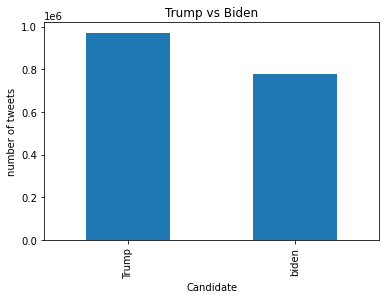

In [14]:
# check the number of tweets received for each of them
data_mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.ylabel('number of tweets')
plt.title('Trump vs Biden')
plt.show()

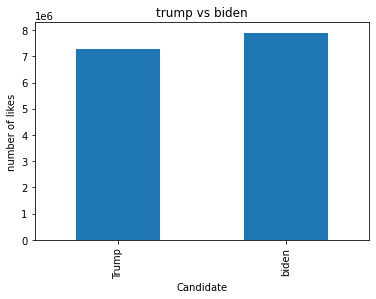

In [15]:
# comparison of likes

data_mixed.groupby('Candidate')['likes'].sum().plot.bar()
plt.ylabel('number of likes')
plt.title('trump vs biden')
plt.show()

In [16]:
data_mixed.country.value_counts()

United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Samoa                            2
Saint Lucia                      1
Northern Mariana Islands         1
East Timor                       1
Lesotho                          1
Name: country, Length: 189, dtype: int64

In [17]:
data_mixed['country']= data_mixed['country'].replace({"United States of America":"US","United States":"US"})

In [18]:
data_mixed.country.value_counts()

US                          394400
United Kingdom               58051
India                        40091
Germany                      35379
France                       35299
                             ...  
Cape Verde                       2
Saint Lucia                      1
East Timor                       1
Lesotho                          1
Northern Mariana Islands         1
Name: country, Length: 188, dtype: int64

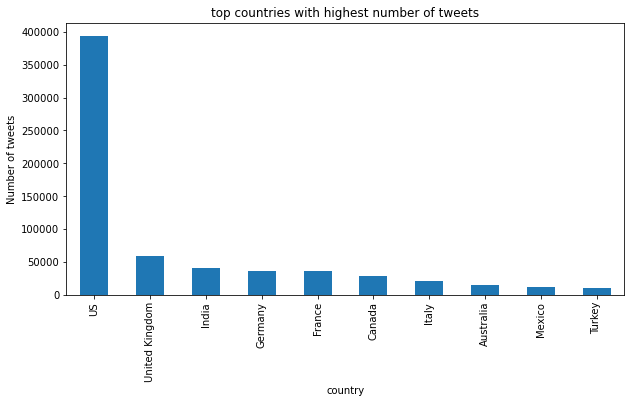

In [19]:
# countries with highest number of tweets
plt.figure(figsize=(10,5))
data_mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of tweets')
plt.title('top countries with highest number of tweets')
plt.show()

In [20]:
# tweets for biden and trump from each country
top10countries = data_mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
tweet_df = data_mixed.groupby(['country','Candidate'])['tweet'].count().reset_index()
tweet_df = tweet_df[tweet_df['country'].isin(top10countries)] 
tweet_df

,country,Candidate,tweet
16,Australia,Trump,9365
17,Australia,biden,5534
54,Canada,Trump,16996
55,Canada,biden,10809
112,France,Trump,20689
113,France,biden,14610
118,Germany,Trump,22618
119,Germany,biden,12761
146,India,Trump,18559
147,India,biden,21532


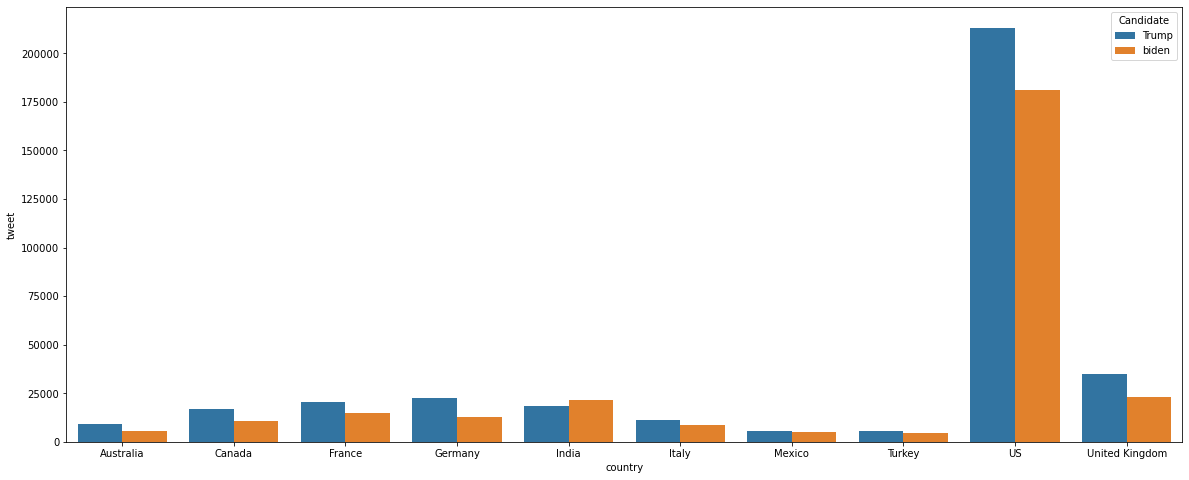

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(data=tweet_df,x='country',y='tweet',hue='Candidate')
plt.show()

In [22]:
top10states = data_mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
state_df = data_mixed.groupby(['state','Candidate'])['tweet'].count().reset_index()
state_df = state_df[state_df['state'].isin(top10states)]
state_df

,state,Candidate,tweet
206,California,Trump,31149
207,California,biden,25817
349,District of Columbia,Trump,9684
350,District of Columbia,biden,7055
386,England,Trump,24111
387,England,biden,16743
410,Florida,Trump,16568
411,Florida,biden,13284
518,Ile-de-France,Trump,9393
519,Ile-de-France,biden,7001


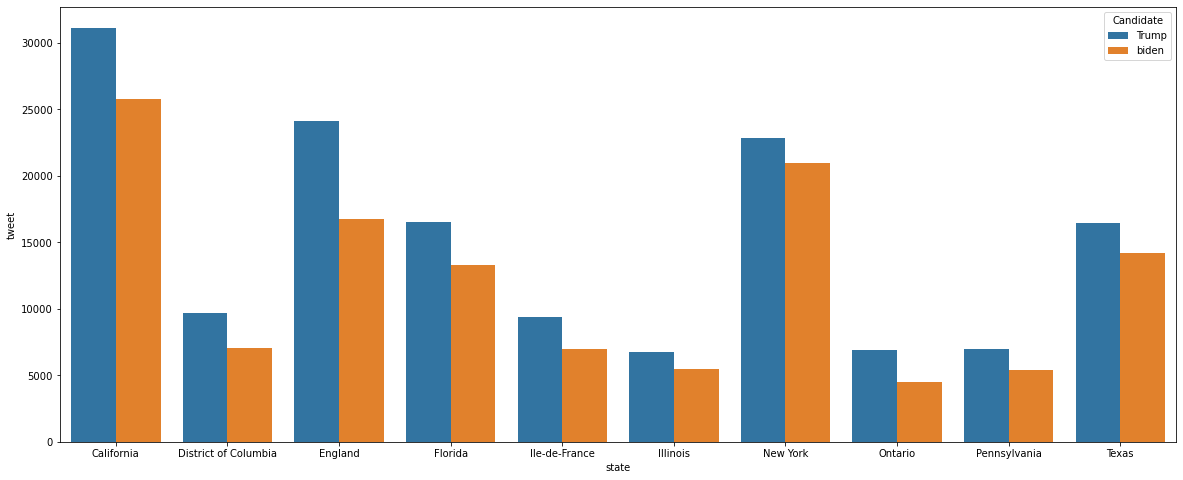

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(data=state_df,x='state',y='tweet',hue='Candidate')
plt.show()

In [24]:
lm = WordNetLemmatizer()

In [25]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text))
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return text

In [26]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score <0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [27]:
trump_tweets = data_mixed.query('(Candidate == "Trump")').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name'])[['tweet','country']]
trump_tweets = trump_tweets.dropna().loc[trump_tweets.country =='US']
trump_tweets.reset_index(inplace = True ,drop =True)

In [28]:
trump_tweets

,tweet,country
0,"Without a doubt, the #FourSeasons debacle is t...",US
1,"President Donald #Trump’s youngest daughter, T...",US
2,Woah. Have you read this article?\n\nAll the p...,US
3,The latest episode of #SNL tackled #DonaldTrum...,US
4,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US
...,...,...
45518,@NBCNews You wanted it over by election nights...,US
45519,"Even if #Trump DID win this election, he would...",US
45520,"Twisted, pressed &amp; curled almost empty too...",US
45521,#Election2020\n#USElectionResults2020\n#Donald...,US


In [29]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)

In [30]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)


In [31]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [32]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)

In [33]:
trump_tweets.head()

,tweet,country,cleantext,subjectivity,polarity,analysis
0,"Without a doubt, the #FourSeasons debacle is t...",US,without doubt fourseasons debacle best part do...,0.483333,0.333333,positive
1,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...,0.000000,0.000000,neutral
2,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...,0.000000,0.000000,neutral
3,The latest episode of #SNL tackled #DonaldTrum...,US,latest episode snl tackled donaldtrump loss co...,0.800000,-0.033333,negative
4,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US,decision joebiden firmar una serie de rdenes e...,0.000000,0.000000,neutral


In [34]:
trump_tweets.analysis.value_counts(normalize=True)*100

neutral     45.627485
positive    34.389210
negative    19.983305
Name: analysis, dtype: float64

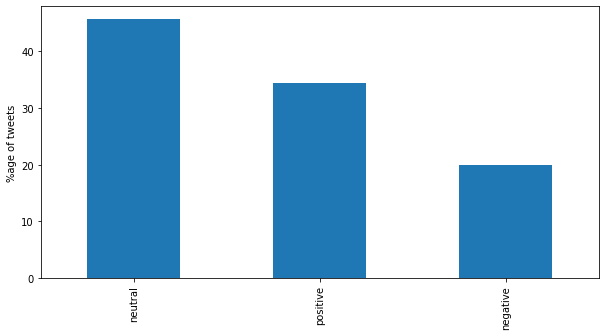

In [35]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5))
(trump_tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel('%age of tweets')
plt.show()

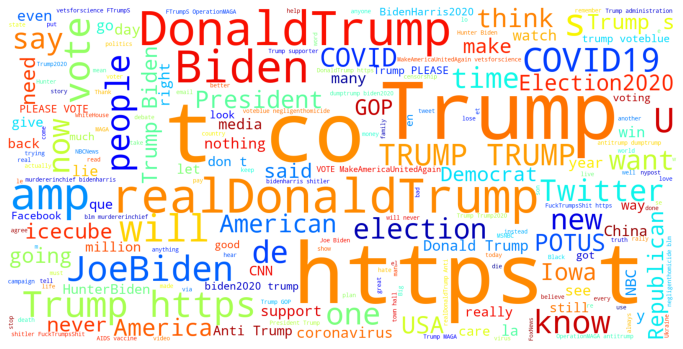

In [37]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join(text for text in wd_list)
    wordcloud = WordCloud(background_color='white',
                         stopwords= stopwords,
                         width=1600, height=800,
                         random_state=1,
                         colormap='jet',
                         max_words=200,
                         max_font_size=200).generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(trump_tweets['cleantext'][:5000])

## Joe Biden Sentiment Analysis

In [38]:
biden_tweets = data_mixed.query('(Candidate=="biden")').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name'])[['tweet','country']]
biden_tweets = biden_tweets.dropna().loc[biden_tweets.country =='US']
biden_tweets.reset_index(inplace = True ,drop =True)

In [39]:
biden_tweets

,tweet,country
0,#JoeBiden is enlisting A-list star power to he...,US
1,While we were campaigning across battleground ...,US
2,The big fight TODAY!!!!! @realDonaldTrump vs #...,US
3,News outlets have projected that #JoeBiden has...,US
4,"During his victory speech, #JoeBiden said he u...",US
...,...,...
57545,46th President of The Unites States! Congratul...,US
57546,Biden IS going to win tonight. #biden #Electio...,US
57547,All 238k deaths recorded in the United States ...,US
57548,Joe Biden'in başa gelmesi bizim bence işimize ...,US


In [40]:
biden_tweets['cleantext'] = biden_tweets['tweet'].apply(clean)

In [41]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)

In [42]:
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)

In [43]:
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)

In [44]:
biden_tweets.head()

,tweet,country,cleantext,subjectivity,polarity,analysis
0,#JoeBiden is enlisting A-list star power to he...,US,joebiden enlisting list star power help close ...,0.00,0.00,neutral
1,While we were campaigning across battleground ...,US,campaigning across battleground state ran grea...,0.75,0.80,positive
2,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,big fight today realdonaldtrump v joebiden got...,0.10,0.00,neutral
3,News outlets have projected that #JoeBiden has...,US,news outlet projected joebiden secured elector...,0.00,0.00,neutral
4,"During his victory speech, #JoeBiden said he u...",US,victory speech joebiden said understood trump ...,0.75,-0.75,negative


In [45]:
biden_tweets.analysis.value_counts(normalize=True)*100

neutral     46.997394
positive    38.748914
negative    14.253692
Name: analysis, dtype: float64

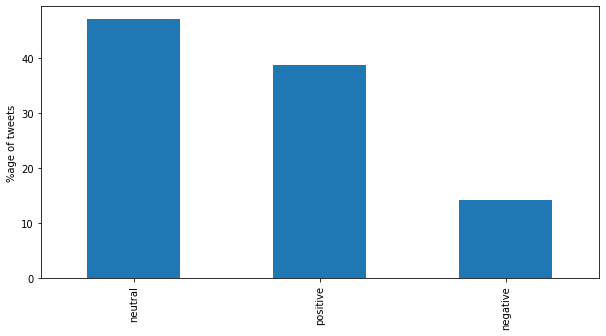

In [46]:
plt.figure(figsize=(10,5))
(biden_tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel('%age of tweets')
plt.show()

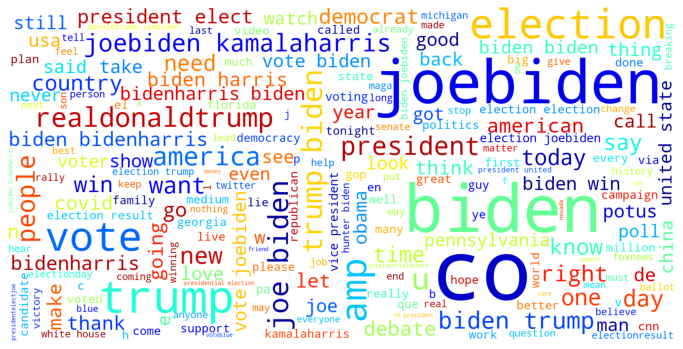

In [48]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join(text for text in wd_list)
    wordcloud = WordCloud(background_color='white',
                         stopwords= stopwords,
                         width=1600, height=800,
                         random_state=1,
                         colormap='jet',
                         max_words=200,
                         max_font_size=200).generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(biden_tweets['cleantext'][:5000])